In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataframes

env = "CartPole"

PPO_cartpole_rewards_df = pd.read_csv("results/comparison/PPO_{}_2.csv".format(env))
DQN_cartpole_rewards_df = pd.read_csv("results/comparison/DQN_{}.csv".format(env))


In [3]:
PPO_cartpole_rewards_df.head()

,Unnamed: 0,Episode,Test_rewards,Seed
0,0,0,15.0,0
1,1,1,54.0,0
2,2,2,13.0,0
3,3,3,34.0,0
4,4,4,18.0,0


In [4]:
DQN_cartpole_rewards_df.head()

,Unnamed: 0,Episode,Train_rewards,Seed,Unnamed: 4
0,0,0,40.0,0,NaN
1,1,1,16.0,0,NaN
2,2,2,22.0,0,NaN
3,3,3,19.0,0,NaN
4,4,4,10.0,0,NaN


In [5]:
min_episode = min(min(PPO_cartpole_rewards_df.value_counts("Seed").astype(int)),min(DQN_cartpole_rewards_df.value_counts("Seed").astype(int)))
min_episode

348

In [6]:
PPO_processed = PPO_cartpole_rewards_df.copy()
PPO_processed["algorithm"] = "PPO"
PPO_processed = PPO_processed.rename(columns={"Test_rewards": "Train_rewards"})
PPO_processed = PPO_processed[["Episode","Train_rewards","Seed","algorithm"]]
# PPO_processed = PPO_processed[PPO_processed["Episode"] < min_episode]
PPO_processed.head()

,Episode,Train_rewards,Seed,algorithm
0,0,15.0,0,PPO
1,1,54.0,0,PPO
2,2,13.0,0,PPO
3,3,34.0,0,PPO
4,4,18.0,0,PPO


In [7]:
DQN_processed = DQN_cartpole_rewards_df.copy()
DQN_processed["algorithm"] = "DQN"
DQN_processed = DQN_processed[["Episode","Train_rewards","Seed","algorithm"]]
# DQN_processed = DQN_processed[DQN_processed["Episode"] < min_episode]
DQN_processed.head()

,Episode,Train_rewards,Seed,algorithm
0,0,40.0,0,DQN
1,1,16.0,0,DQN
2,2,22.0,0,DQN
3,3,19.0,0,DQN
4,4,10.0,0,DQN


In [8]:
frames = [PPO_processed,DQN_processed]
all_rewards = pd.concat(frames)
all_rewards.head()


,Episode,Train_rewards,Seed,algorithm
0,0,15.0,0,PPO
1,1,54.0,0,PPO
2,2,13.0,0,PPO
3,3,34.0,0,PPO
4,4,18.0,0,PPO


KeyboardInterrupt: 

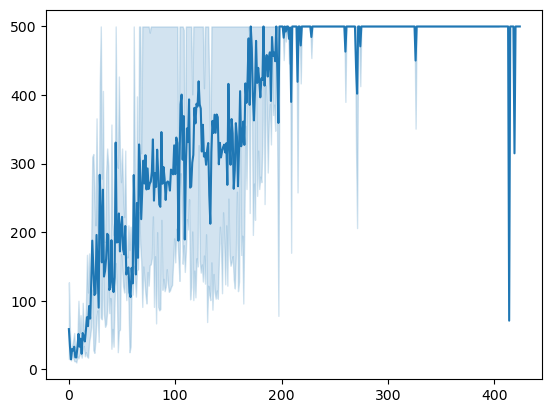

In [9]:
sns.lineplot(data = all_rewards, x="Episode", y="Train_rewards",hue = "algorithm")
plt.title("DQN and PPO comparison on {}-v1".format(env))
plt.xlabel("Episode")
plt.ylabel("Rewards")
plt.axvline(x = 500, color = 'r', label = 'DQN_terminated')
plt.savefig("results/comparison/dqn_ppo_{}-V1.png".format(env))
plt.show()